**Author: Prashant Jeswani Tejwani**

In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Definir términos y variables 

Se crea un sistema de aire acondicionado de 5 niveles. El sistema ajusta la temperatura del aire acondicionado comparando la temperatura ambiente y el valor de temperatura objetivo.

La formulación de este problema sería:

**Antecedentes (Entradas):**
- Temperature: representa la temperatura ambiente de la habitación, oficina... 
- Target: representa la temperatura objetivo a la que se quiere llegar a tener.


**Consecuentes (Salidas):**
- Change: ¿Qué comando se debe elegir para llegar a la temperatura objetivo?

Los conjuntos difusos establecidos son:

                             Temperature = [very_cold, cold, warm, hot, very_hot]
                             Target = [very_cold, cold, warm, hot, very_hot]
                             Change = [heat, no_change, cool] 

Si se respresenta el sistema sería como la siguiente figura:

![https://github.com/Prashant-JT/FuzzyLogic-Example/blob/master/system.PNG](system.PNG)

In [2]:
# Temperature = {very_cold, cold, warm, hot, very_hot}
temperature = ctrl.Antecedent(np.arange(0, 41, 0.1), 'temperature')
# Target = {very_cold, cold, warm, hot, very_hot}
target = ctrl.Antecedent(np.arange(0, 41, 0.1), 'target')
# Change = {heat, no_change, cool} 
change = ctrl.Consequent(np.arange(0, 41, 1), 'change')

### 2. Construir las funciones de pertenencia

A continuación, se crean las funciones de pertenencia:

In [3]:
# Auto-membership function population and changing labels
temperature.automf(5)
target.automf(5)
names = ['very_cold', 'cold', 'warm', 'hot', 'very_hot']
temperature.automf(names=names)
target.automf(names=names)

In [4]:
change['cool'] = fuzz.trimf(change.universe, [0, 0, 21])
change['no_change'] = fuzz.trimf(change.universe, [16, 26, 35])
change['heat'] = fuzz.trimf(change.universe, [30, 50, 50])

c:\python\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\python\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\python\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


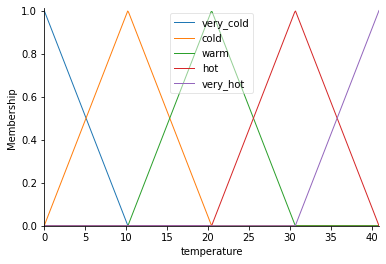

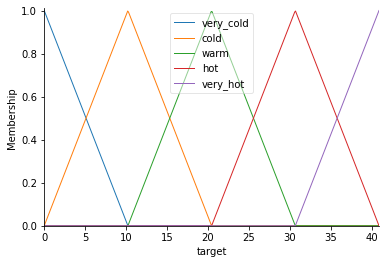

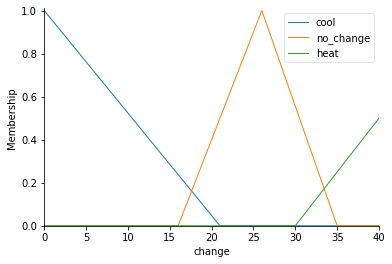

In [5]:
# You can see how these look with .view()
temperature.view()
target.view()
change.view()

plt.show()

### 3. Construir las reglas de la base de conocimientos

Se define la relación difusa entre las variables de entrada y salida creando el conjunto de reglas en la base de conocimientos.

In [6]:
# Some rules
rule1 = ctrl.Rule(temperature['cold'] | temperature['very_cold'] & target['warm'], change['heat'])
rule2 = ctrl.Rule(temperature['hot'] | temperature['very_hot'] & target['warm'], change['cool'])
rule3 = ctrl.Rule(temperature['warm'] & target['warm'], change['no_change'])

Finalmente, se crea el sistema:

In [7]:
# Create system
temperature_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
air_conditioner = ctrl.ControlSystemSimulation(temperature_ctrl)

### Uso

Si le pedimos a al sistema que diga el comando a ejecutar, siendo la temperatura ambiente 38º y la temperatura objetivo 21º, éste nos recomendaría que el comando sea 'cool'.

7.438663406682968


c:\python\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


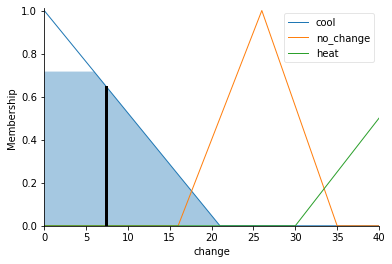

In [8]:
# Pass example inputs to the ControlSystem using Antecedent labels 
air_conditioner.input['temperature'] = 38
air_conditioner.input['target'] = 21

# Compute
air_conditioner.compute()

# Print result
print(air_conditioner.output['change'])
change.view(sim=air_conditioner)

plt.show()